In [2]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


df = pd.read_csv(r'https://drive.google.com/uc?export=download&id=1FPODeQyRAPclcUL-ZoDf_MC7Gr0dYHha')
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
# Identify missing data (NaN)

for col in df.columns:
  missing_percent = np.mean(df[col].isnull())

  print('{} - {}%'.format(col, round(missing_percent*100)))


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [ ]:
# Drop, Rename and Change data type

df.dtypes


df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')


df = df.rename(columns = {'country':'origin country'})
df = df.rename(columns = {'name':'movie name'})


df = df.drop(columns=['year'])
df.head()



,movie name,rating,genre,released,score,votes,director,writer,star,origin country,budget,gross,company,runtime
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [ ]:
# Create 'released year' from 'released' column

released_parts = df['released'].str.split(r'[,()]', expand=True)
display(released_parts.head())


df['released year'] = released_parts[1].str.strip()
df.head()


,0,1,2,3
0,June 13,1980,United States,
1,July 2,1980,United States,
2,June 20,1980,United States,
3,July 2,1980,United States,
4,July 25,1980,United States,


,movie name,rating,genre,released,score,votes,director,writer,star,origin country,budget,gross,company,runtime,released year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [ ]:
df.sort_values(by=['gross'], inplace=False, ascending=False)


,movie name,rating,genre,released,score,votes,director,writer,star,origin country,budget,gross,company,runtime,released year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
641,Blame It on the Night,PG-13,Comedy,"November 2, 1984 (United States)",5.1,172.0,Gene Taft,Gene Taft,Nick Mancuso,United States,0,0,Delphi II Productions,85.0,1984
7658,Black Wall Street Burning,R,Drama,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,0,Notis Studio,78.0,2020
671,Flesh+Blood,R,Adventure,"August 30, 1985 (United States)",6.7,17000.0,Paul Verhoeven,Gerard Soeteman,Rutger Hauer,Netherlands,6500000,0,Riverside Pictures,126.0,1985


In [3]:
# Removing duplicates in DataFrame

df['company'].drop_duplicates()
df.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


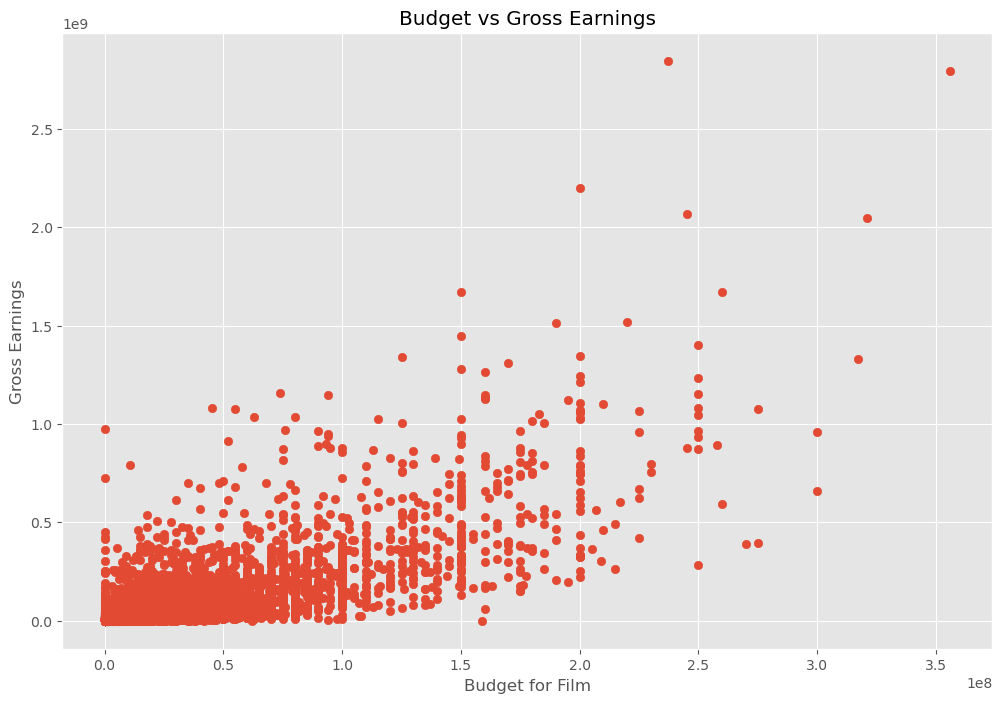

,movie name,rating,genre,released,score,votes,director,writer,star,origin country,budget,gross,company,runtime,released year
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0,2007
7066,Justice League,PG-13,Action,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0,2017
7261,Solo: A Star Wars Story,PG-13,Action,"May 25, 2018 (United States)",6.9,306000.0,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,United States,275000000,392924807,Lucasfilm,135.0,2018
7463,Star Wars: Episode IX - The Rise of Skywalker,PG-13,Action,"December 20, 2019 (United States)",6.5,394000.0,J.J. Abrams,Chris Terrio,Daisy Ridley,United States,275000000,1078232589,Walt Disney Pictures,141.0,2019
4870,Superman Returns,PG-13,Action,"June 28, 2006 (United States)",6.0,274000.0,Bryan Singer,Michael Dougherty,Brandon Routh,United States,270000000,391081192,Warner Bros.,154.0,2006
7480,The Lion King,PG,Animation,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
5658,Tangled,PG,Animation,"November 24, 2010 (United States)",7.7,417000.0,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260000000,592462816,Walt Disney Animation Studios,100.0,2010


In [ ]:
# Scatter Plot for Correlation Budget vs Gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show()


df = df.sort_values(by=['budget'], inplace=False, ascending=False)
df.head(10)


<Axes: xlabel='budget', ylabel='gross'>

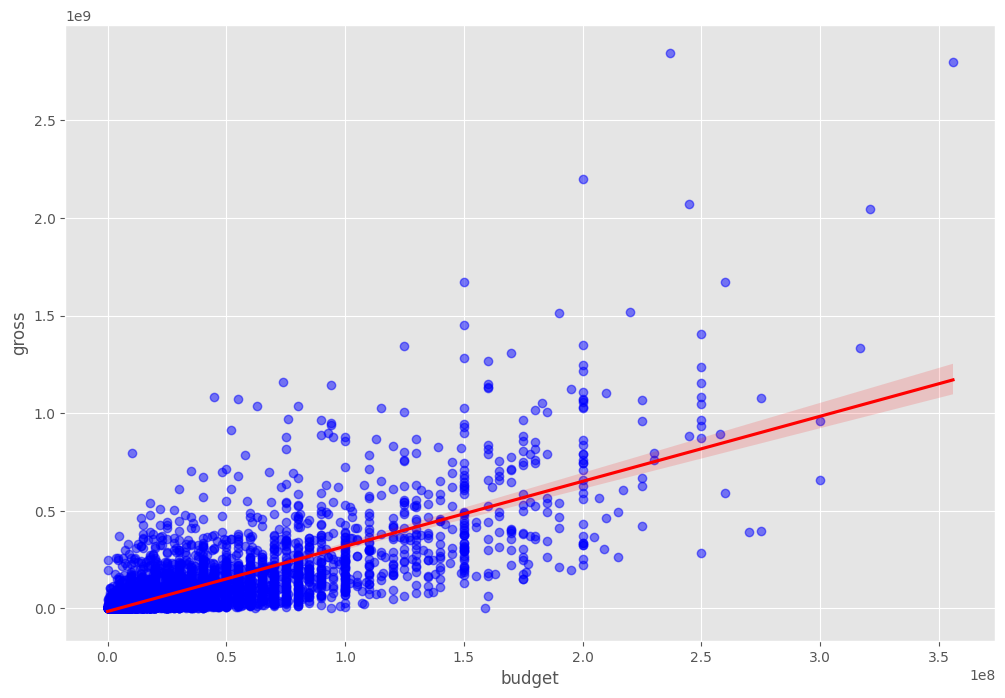

In [2]:
# Budget vs Gross Regression Plot

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'blue','alpha':0.5}, line_kws={'color':'red'})


,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.399451,0.309212,0.269510,0.245235,1.000000


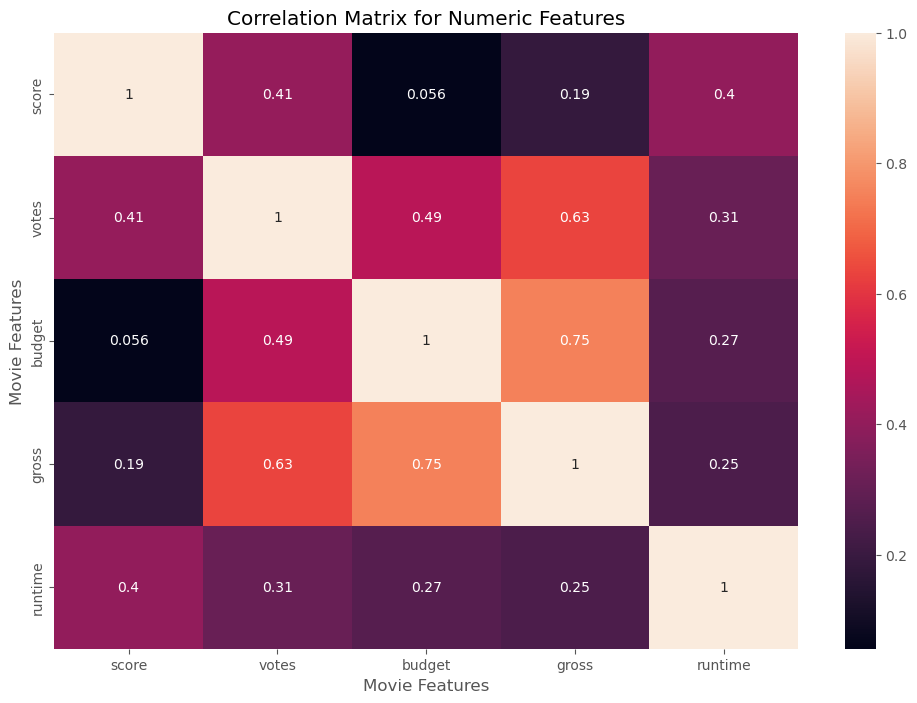

In [ ]:
# Correlation Matrix and Heatmap for Numerical data

numerical_df = df.select_dtypes(include=[np.number])
numerical_df.corr(method='pearson')

display(numerical_df.corr(method='pearson'))



numerical_correlation = numerical_df.corr(method='pearson')

sns.heatmap(numerical_correlation, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()


In [5]:
# Numerical Encoding DataFrame

df_numerized = df

for col_name in df_numerized.columns:
  if (df_numerized[col_name].dtypes == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes


df_numerized.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


,movie name,rating,genre,released,score,votes,director,writer,star,origin country,budget,gross,company,runtime,released year
movie name,1.000000,-0.008069,0.016355,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.012091
rating,-0.008069,1.000000,0.072423,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.009161
genre,0.016355,0.072423,1.000000,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.061437
released,-0.011311,0.016613,0.029822,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,-0.009736
score,0.017097,-0.001314,0.027965,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.107524
votes,0.013088,0.033225,-0.145307,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.203059
director,0.009079,0.019483,-0.015258,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.022765
writer,0.009081,-0.005921,0.006567,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.010000
star,0.006472,0.013405,-0.005477,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.031569
origin country,-0.010737,0.081244,-0.037615,-0.020427,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.131720,0.095325,0.095548,-0.078412,-0.088721


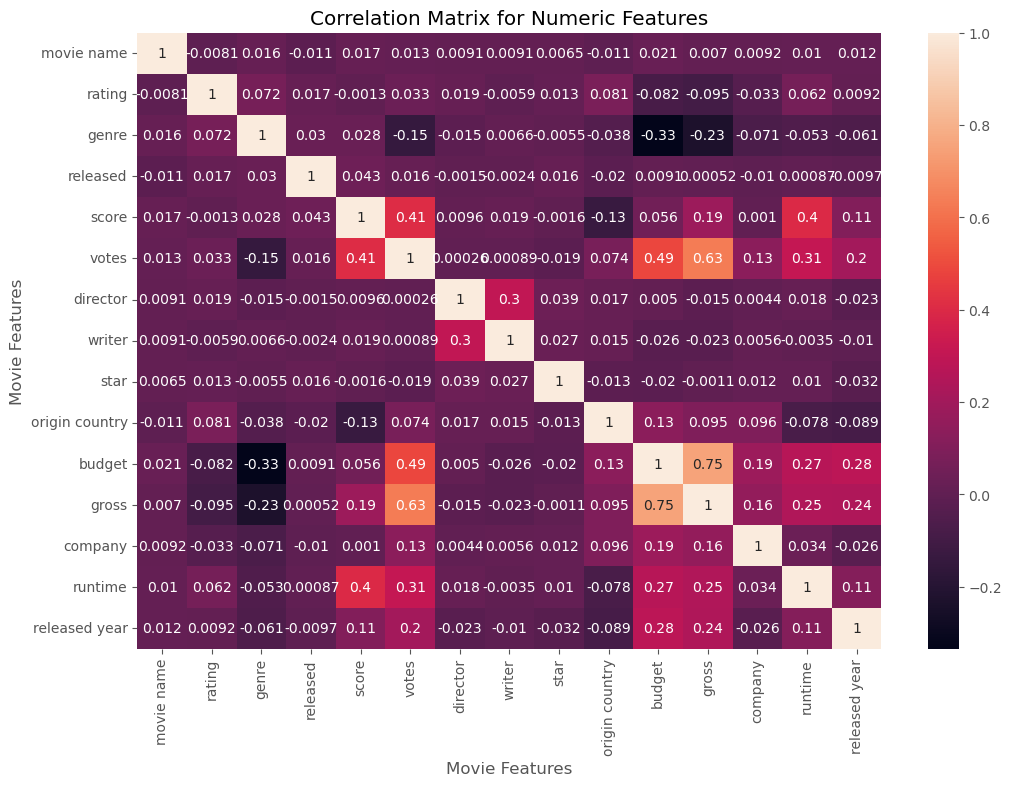

In [ ]:
# Correlation Matrix and Heatmap for Numerical Encoding DataFrame

df_numerized.corr(method='pearson')
display(df_numerized.corr(method='pearson'))


numerized_correlation = df_numerized.corr(method='pearson')

sns.heatmap(numerized_correlation, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()


In [6]:
# Displaying high correlation data

correlation_pair = df_numerized.corr().unstack().sort_values()

high_correlation = correlation_pair[(correlation_pair)> 0.5]
display(high_correlation)


votes     gross       0.630757
gross     votes       0.630757
budget    gross       0.740395
gross     budget      0.740395
released  released    1.000000
score     score       1.000000
rating    rating      1.000000
name      name        1.000000
genre     genre       1.000000
year      year        1.000000
director  director    1.000000
votes     votes       1.000000
writer    writer      1.000000
star      star        1.000000
budget    budget      1.000000
country   country     1.000000
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

Result from the analysis shows that budget vs gross have high correlation instead of company vs gross